In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
df =  pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

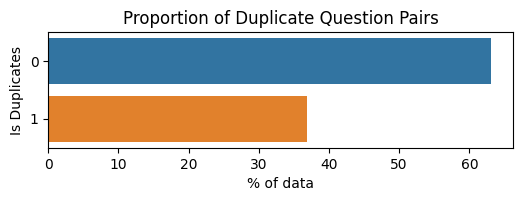

In [4]:
fig= plt.figure(figsize=(6,1.5))
sns.barplot(x=100*df['is_duplicate'].value_counts()/len(df),
            y=(100*df['is_duplicate'].value_counts()/len(df)).index,orient='h',).set(ylabel="Is Duplicates",xlabel="% of data",title="Proportion of Duplicate Question Pairs")
plt.show()

In [5]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
56463,56463,99371,99372,How do I end our relationship?,What is the best way to end a relationship?,0
90227,90227,151440,151441,To which address should I send the application...,How can I join Indian Navy as officer?,0
150187,150187,236427,236428,Should I attend MIT or Purdue for Aerospace en...,Sr. SAP FICO Systems analyst salary?,0
233627,233627,312009,201014,If the civil war occurred today who would win?,If we had another civil war and it was North v...,1
232114,232114,109727,342074,"Which countries still have a ""morning queue"" a...",Which countries have 2-day weekend and why?,0
359358,359358,403206,280403,Can animals see spirits?,Can animals see ghosts or spirits?,1
386730,386730,518979,310075,"Trademarks: What's the difference between ®, ©...",What is the difference between a copyright and...,0
143757,143757,180386,72218,What is the best job for a 12 year old?,What are some good paying jobs for a 12 year old?,1
353969,353969,483052,104608,Why is Quora not rolling out an option on the ...,Why doesn't Quora have a night mode?,1
113946,113946,44890,186090,What hotel in Araku Valley Hill-station would ...,What hotel in Nubra Valley Hill-station would ...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
# repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


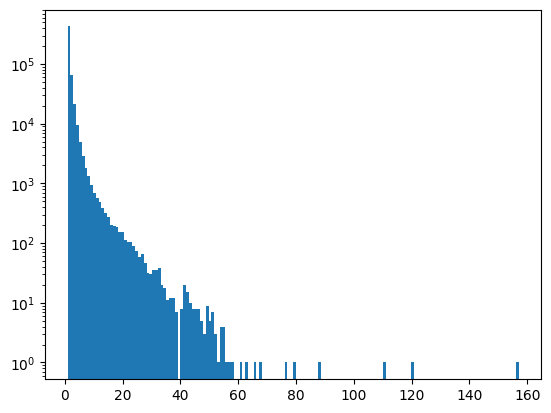

In [10]:

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

**BOW**

In [11]:
new_df = df.sample(30000)

In [12]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
new_df.duplicated().sum()

0

In [14]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
259847,How can I tell a friend that I love her/him?,How can I tell my girlfriend that I love her?
99489,What is run at rate?,What is run rate in cricket?
275997,How good is Cartin.in ecommerce website develo...,Which technology is best for ecommerce website...
183890,What makes diamond the hardest material?,What is the hardest natural substance after di...
120835,Does Craigslist have an API?,Why doesn't Craigslist create an API so we can...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#merging texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [16]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
259847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [20]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
259847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7381666666666666

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.727